# Student Performance Prediction using Linear Regression

## Introduction

In this project, we will analyze the **StudentsPerformance dataset* from Kaggle and build a **Linear Regression model** to predict students' exam scores.  
The main goals are:
- Understand how demographic and socio-economic factors affect performance.  
- Use Linear Regression to predict the **math score**.  
- Evaluate how well the model explains student performance.  

## Dataset Overview

### Importing required libraries

In [114]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Working on the Dataframe

In [115]:
df=pd.read_csv("StudentsPerformance.csv")
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [117]:
df.shape

(1000, 8)

In [118]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

## Exploratory Data Analysis (EDA)

### Distribution of Scores

<Axes: xlabel='math score', ylabel='Count'>

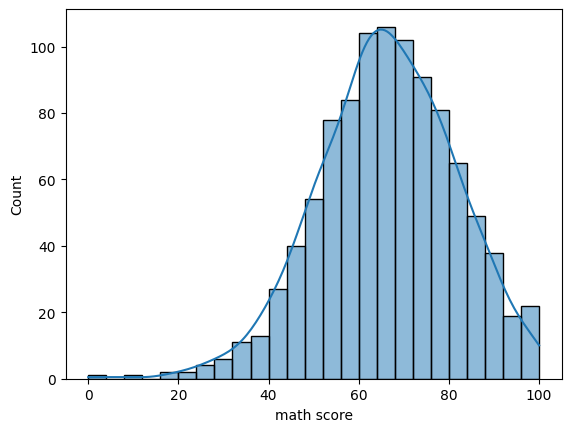

In [119]:
sns.histplot(df['math score'],kde=True)

'math score' is left skewed

<Axes: xlabel='reading score', ylabel='Count'>

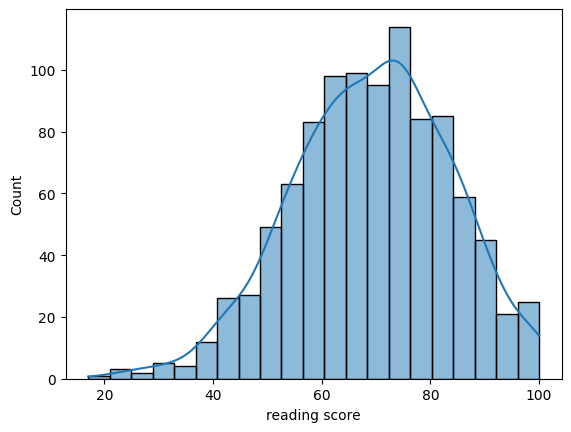

In [120]:
sns.histplot(df['reading score'],kde=True)

'reading score' is left skewed

<Axes: xlabel='writing score', ylabel='Count'>

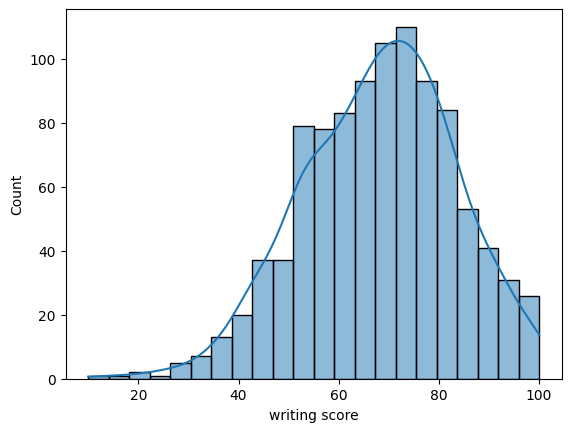

In [121]:
sns.histplot(df['writing score'],kde=True)

'writing score' is left skewed

### Gender Analysis

Text(0.5, 1.0, 'Avg writing score by gender')

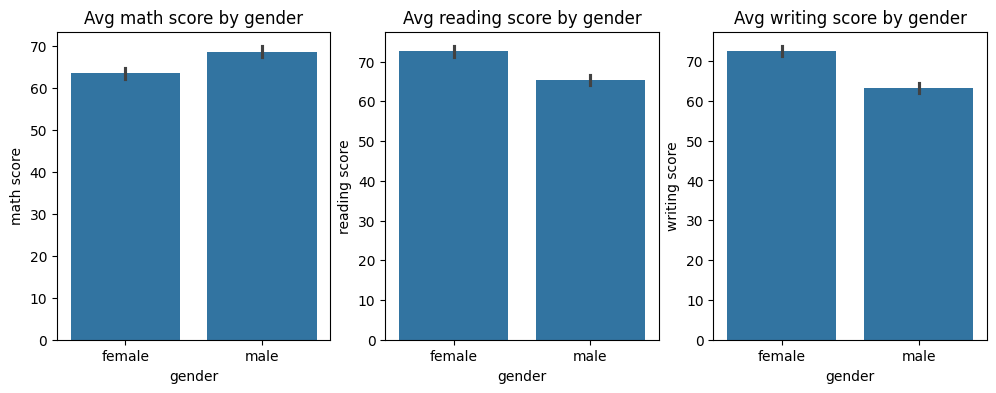

In [122]:
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
sns.barplot(data=df, x="gender", y="math score")
plt.title("Avg math score by gender")
plt.subplot(1,3,2)
sns.barplot(data=df, x="gender", y="reading score")
plt.title("Avg reading score by gender")
plt.subplot(1,3,3)
sns.barplot(data=df, x="gender", y="writing score")
plt.title("Avg writing score by gender")

Avg math score is higher in male <br>
Avg reading and writing score is higher in female

### Race/Ethinicity Analysis

Text(0.5, 1.0, 'Avg Math Score by Race/Ethnicity')

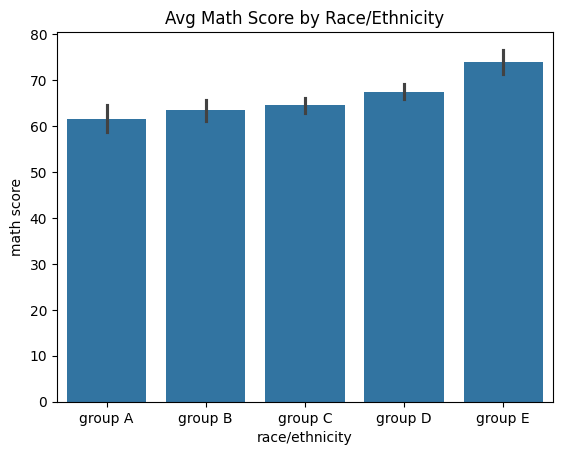

In [123]:
sns.barplot(data=df, x="race/ethnicity", y="math score", order=sorted(df["race/ethnicity"].unique()))
plt.title("Avg Math Score by Race/Ethnicity")

Group E has the highest math score and group A has the lowest math score

Text(0.5, 1.0, 'Avg Reading Score by Race/Ethnicity')

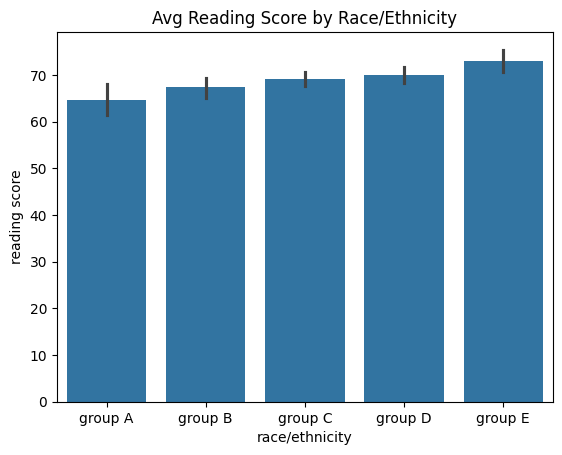

In [124]:
sns.barplot(data=df, x="race/ethnicity", y="reading score", order=sorted(df["race/ethnicity"].unique()))
plt.title("Avg Reading Score by Race/Ethnicity")

Group E has the highest reading score and group A has the lowest reading score

Text(0.5, 1.0, 'Avg Writing Score by Race/Ethnicity')

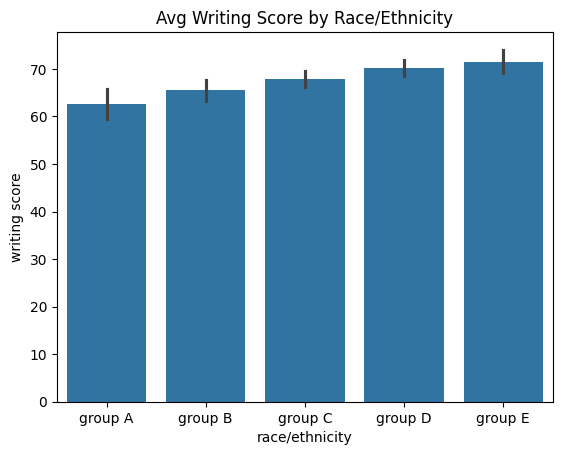

In [125]:
sns.barplot(data=df, x="race/ethnicity", y="writing score", order=sorted(df["race/ethnicity"].unique()))
plt.title("Avg Writing Score by Race/Ethnicity")

Group E has the highest writing score and group A has the lowest writing score

### Parental Education Analysis

Text(0.5, 1.0, 'Avg Math Score by Parental Education')

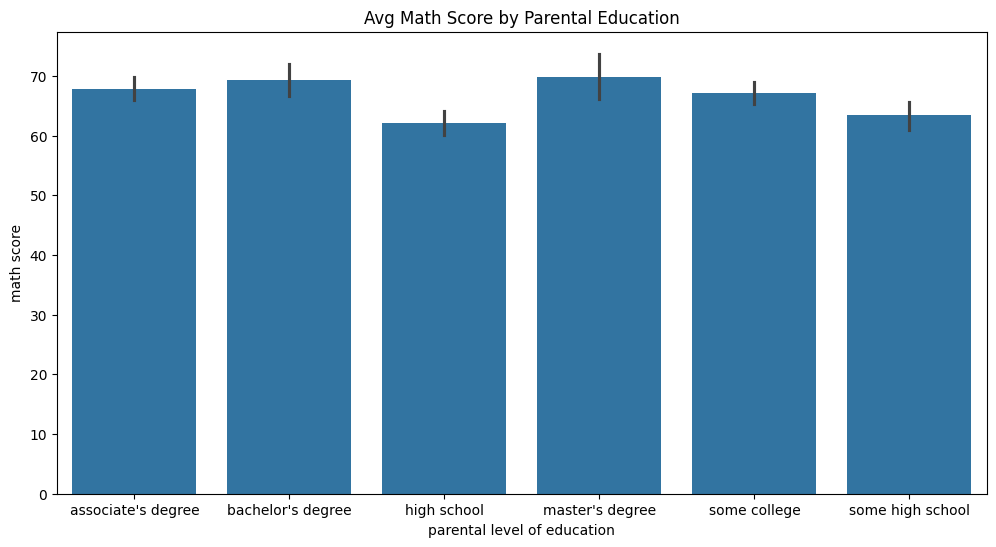

In [126]:
plt.figure(figsize=(12,6))
sns.barplot(data=df, x="parental level of education", y="math score", order=sorted(df["parental level of education"].unique()))
plt.title("Avg Math Score by Parental Education")

Children with parents having master's degree have highest maths score <br>
Children with parents having high school degree have lowest maths score

Text(0.5, 1.0, 'Avg Reading Score by Parental Education')

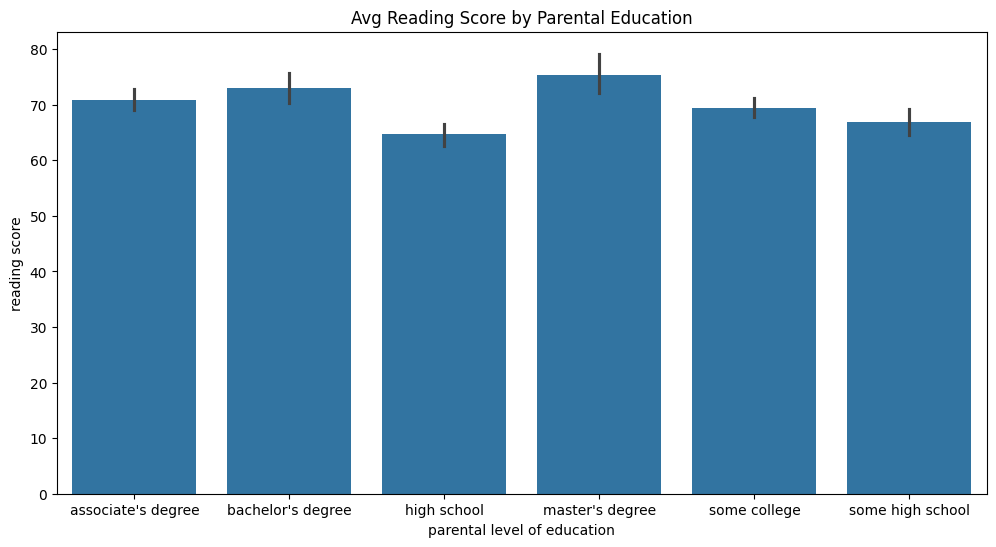

In [127]:
plt.figure(figsize=(12,6))
sns.barplot(data=df, x="parental level of education", y="reading score", order=sorted(df["parental level of education"].unique()))
plt.title("Avg Reading Score by Parental Education")

Children with parents having master's degree have highest reading score <br>
Children with parents having high school degree have lowest reading score

Text(0.5, 1.0, 'Avg Writing Score by Parental Education')

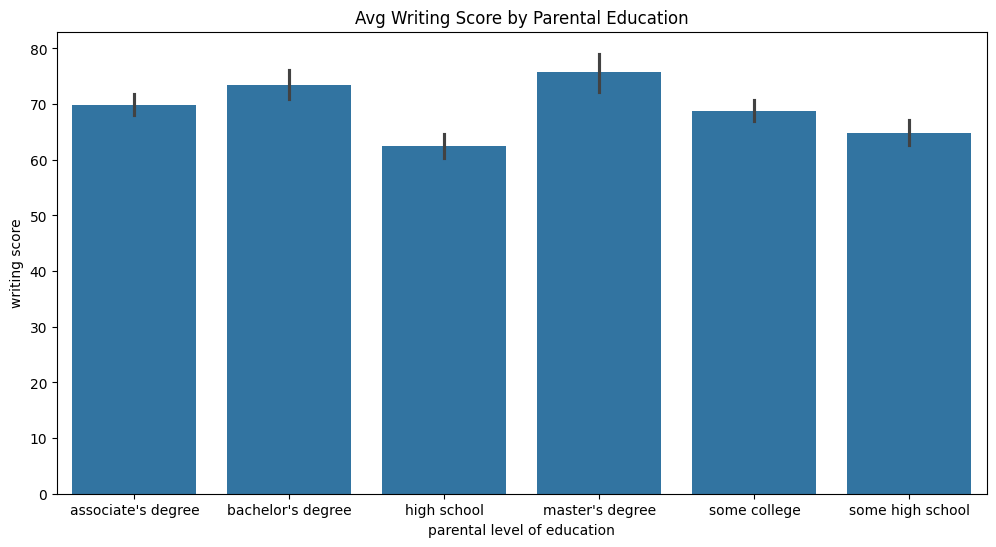

In [128]:
plt.figure(figsize=(12,6))
sns.barplot(data=df, x="parental level of education", y="writing score", order=sorted(df["parental level of education"].unique()))
plt.title("Avg Writing Score by Parental Education")

Children with parents having master's degree have highest writing score <br>
Children with parents having high school degree have lowest writing score

### Lunch analysis

Text(0.5, 1.0, 'Avg Writing Score by Lunch Type')

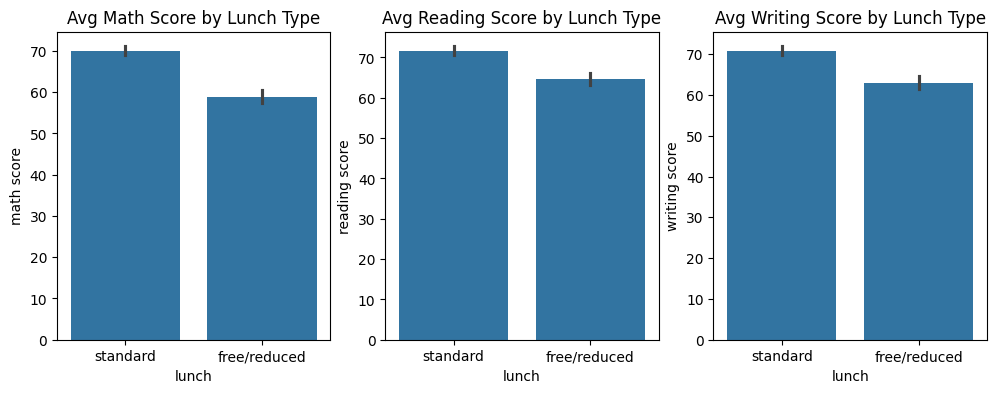

In [129]:
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
sns.barplot(data=df, x="lunch", y="math score")
plt.title("Avg Math Score by Lunch Type")
plt.subplot(1,3,2)
sns.barplot(data=df, x="lunch", y="reading score")
plt.title("Avg Reading Score by Lunch Type")
plt.subplot(1,3,3)
sns.barplot(data=df, x="lunch", y="writing score")
plt.title("Avg Writing Score by Lunch Type")

Children with standard lunch have higher scores

### Test preparation course analysis

Text(0.5, 1.0, 'Avg Writing Score by Test Preparation')

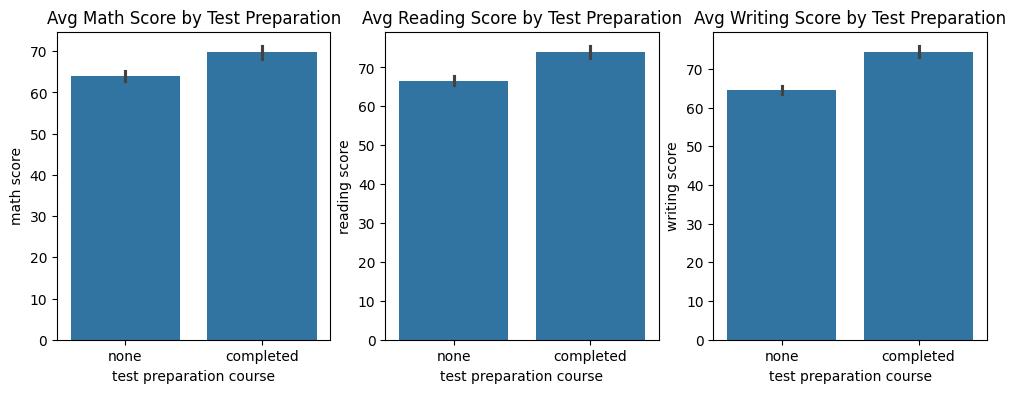

In [130]:
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
sns.barplot(data=df, x="test preparation course", y="math score")
plt.title("Avg Math Score by Test Preparation")
plt.subplot(1,3,2)
sns.barplot(data=df, x="test preparation course", y="reading score")
plt.title("Avg Reading Score by Test Preparation")
plt.subplot(1,3,3)
sns.barplot(data=df, x="test preparation course", y="writing score")
plt.title("Avg Writing Score by Test Preparation")

Children with completed course have higher scores

## Data Preprocessing

### Feature Selection

In [131]:
X= df[["gender","race/ethnicity","parental level of education", "lunch", "test preparation course"]]
X.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course
0,female,group B,bachelor's degree,standard,none
1,female,group C,some college,standard,completed
2,female,group B,master's degree,standard,none
3,male,group A,associate's degree,free/reduced,none
4,male,group C,some college,standard,none


In [132]:
y=df[["math score"]]
y.head()

,math score
0,72
1,69
2,90
3,47
4,76


### Check for Missing Values

In [133]:
X.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
dtype: int64

In [134]:
y.isnull().sum()

math score    0
dtype: int64

### Encoding Categorical Variables

In [135]:
X_encoded= pd.get_dummies(X, drop_first=True)
X_encoded.head()

,gender_male,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_standard,test preparation course_none
0,False,True,False,False,False,True,False,False,False,False,True,True
1,False,False,True,False,False,False,False,False,True,False,True,False
2,False,True,False,False,False,False,False,True,False,False,True,True
3,True,False,False,False,False,False,False,False,False,False,False,True
4,True,False,True,False,False,False,False,False,True,False,True,True


In [136]:
X_encoded.shape

(1000, 12)

### Train-Test Split

In [137]:
from sklearn.model_selection import train_test_split

In [138]:
X_train, X_test, y_train, y_test= train_test_split(X_encoded,y, test_size=0.2, random_state=42)

In [139]:
print("Training set:", X_train.shape, y_train.shape)
print("Testing set:", X_test.shape, y_test.shape)

Training set: (800, 12) (800, 1)
Testing set: (200, 12) (200, 1)


## Standardization

In [140]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()

In [141]:
X_train_scaled= scaler.fit_transform(X_train)
X_train_scaled

array([[-0.94880848, -0.48628803, -0.69388867, ..., -0.45457288,
         0.72776144,  0.73178456],
       [-0.94880848, -0.48628803,  1.44115338, ..., -0.45457288,
        -1.37407665, -1.36652242],
       [-0.94880848, -0.48628803, -0.69388867, ..., -0.45457288,
        -1.37407665,  0.73178456],
       ...,
       [-0.94880848, -0.48628803,  1.44115338, ..., -0.45457288,
         0.72776144,  0.73178456],
       [ 1.05395348, -0.48628803,  1.44115338, ..., -0.45457288,
        -1.37407665, -1.36652242],
       [-0.94880848, -0.48628803, -0.69388867, ..., -0.45457288,
         0.72776144,  0.73178456]], shape=(800, 12))

In [142]:
X_test_scaled= scaler.transform(X_test)
X_test_scaled

array([[-0.94880848, -0.48628803,  1.44115338, ..., -0.45457288,
         0.72776144,  0.73178456],
       [-0.94880848,  2.05639446, -0.69388867, ..., -0.45457288,
        -1.37407665, -1.36652242],
       [ 1.05395348, -0.48628803, -0.69388867, ..., -0.45457288,
         0.72776144,  0.73178456],
       ...,
       [-0.94880848,  2.05639446, -0.69388867, ..., -0.45457288,
        -1.37407665,  0.73178456],
       [-0.94880848, -0.48628803,  1.44115338, ..., -0.45457288,
         0.72776144,  0.73178456],
       [-0.94880848, -0.48628803, -0.69388867, ...,  2.19986728,
         0.72776144, -1.36652242]], shape=(200, 12))

## Model Training

In [143]:
from sklearn.linear_model import LinearRegression
regressor= LinearRegression()

In [144]:
regressor.fit(X_train_scaled,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [145]:
coef=regressor.coef_
intercept=regressor.intercept_
print("Intercept:", intercept)
print("Coefficients:", coef)

Intercept: [66.49625]
Coefficients: [[ 2.25723998  0.07172018  0.28237058  1.56927801  3.19634836  1.01357149
  -1.63235388  0.25270002 -0.06078983 -1.09114971  5.48281843 -2.7996443 ]]


In [146]:
pred_train=regressor.predict(X_train_scaled)
pred_test=regressor.predict(X_test_scaled)

## Model Evaluation

In [147]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [148]:
r2_train = r2_score(y_train, pred_train)
mae_train = mean_absolute_error(y_train, pred_train)
rmse_train = np.sqrt(mean_squared_error(y_train, pred_train))

In [149]:
print("Training Performance:")
print(f"R²: {r2_train:.4f}")
print(f"MAE: {mae_train:.4f}")
print(f"RMSE: {rmse_train:.4f}")

Training Performance:
R²: 0.2666
MAE: 10.4697
RMSE: 12.8585


In [150]:
r2_test = r2_score(y_test, pred_test)
mae_test = mean_absolute_error(y_test, pred_test)
rmse_test = np.sqrt(mean_squared_error(y_test,pred_test))

In [151]:
print("\nTest Performance:")
print(f"R²: {r2_test:.4f}")
print(f"MAE: {mae_test:.4f}")
print(f"RMSE: {rmse_test:.4f}")


Test Performance:
R²: 0.1760
MAE: 11.2699
RMSE: 14.1602


## Test with custom data


### Input data

In [153]:
gender = input("Enter gender (male/female): ")
race = input("Enter race/ethnicity (group A, group B, group C, group D, group E): ")
parent_edu = input("Enter parental level of education: ")
lunch = input("Enter lunch type (standard/free/reduced): ")
test_prep = input("Enter test preparation course (completed/none): ")
reading = float(input("Enter reading score: "))
writing = float(input("Enter writing score: "))

Enter gender (male/female):  male
Enter race/ethnicity (group A, group B, group C, group D, group E):  group A
Enter parental level of education:  high school
Enter lunch type (standard/free/reduced):  standard
Enter test preparation course (completed/none):  completed
Enter reading score:  99
Enter writing score:  98


### Create DataFrame from inputs

In [154]:
cust_data = pd.DataFrame({
    'gender': [gender],
    'race/ethnicity': [race],
    'parental level of education': [parent_edu],
    'lunch': [lunch],
    'test preparation course': [test_prep],
    'reading score': [reading],
    'writing score': [writing]
})
cust_data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,reading score,writing score
0,male,group A,high school,standard,completed,99.0,98.0


### Apply One-Hot Encoding

In [157]:
cust_data_encoded = pd.get_dummies(cust_data)
cust_data_encoded

,reading score,writing score,gender_male,race/ethnicity_group A,parental level of education_high school,lunch_standard,test preparation course_completed
0,99.0,98.0,True,True,True,True,True


### Align with training columns

In [158]:
cust_data_encoded = cust_data_encoded.reindex(columns=X_train.columns, fill_value=0)
cust_data_encoded

,gender_male,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_standard,test preparation course_none
0,True,0,0,0,0,0,True,0,0,0,True,0


In [159]:
cust_data_encoded.shape

(1, 12)

### Standardization features

In [162]:
cust_data_scaled = scaler.transform(cust_data_encoded)
cust_data_scaled

array([[ 1.05395348, -0.48628803, -0.69388867, -0.58119931, -0.41181385,
        -0.36927447,  2.00784624, -0.24983394, -0.54267705, -0.45457288,
         0.72776144, -1.36652242]])

### Predict custom input

In [163]:
prediction = regressor.predict(cust_data_scaled)

In [167]:
print(f"Predicted maths score is {round(prediction[0][0])}")

Predicted maths score is 71
